# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")

In [3]:
north_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [5]:
# get columns with data type and non-null information
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [6]:
# Put your EDA code here
#1
north_df["Rep ID"].nunique()

#Rep count in north branch = 9. 

9

In [7]:
# What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for north branch?
# be sure to exclude null values
north_ave = north_df.mean(axis = 0, skipna = True, numeric_only = True)
north_ave

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [8]:
# What is the number of calls taken for each time block for the north center?
north_time_blocks = north_df['Time Block'].value_counts()
north_time_blocks

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [9]:
#2
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [10]:
#3
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [11]:
# get columns with data type and non-null information
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [6]:
#1
south_df["Rep ID"].nunique()

#Rep Count in South branch = 11

11

In [12]:
# What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for south branch?
# be sure to exclude null values
south_ave = south_df.mean(axis = 0, skipna = True, numeric_only= True)
south_ave

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [8]:
#2
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [10]:
#3
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?

North = 9

South = 11

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
North

Busy Minutes 9.987755

Not Ready Minutes 1.914286

Incoming Wait Time 3.048780

During Call Wait Time 2.967347

South

Busy Minutes 10.054140

Not Ready Minutes 1.910828

Incoming Wait Time 3.000000

During Call Wait Time 3.076433

3. What is the number of calls taken for each time block?

North

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5

South

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [13]:
# Clean your data here
# north_null = north_df[north_df['Incoming Wait Time'] == 'NaN']['Incoming or Outgoing']
# north_null

#north_df.loc[north_df['Incoming Wait Time'].isin(["NaN"])]

north_df.loc[(north_df['Incoming or Outgoing'] == 'Outgoing') & (north_df['Incoming Wait Time'] == 3.0)]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [14]:
# Clean your data here
# north_null = north_df[north_df['Incoming Wait Time'] == 'NaN']['Incoming or Outgoing']
# north_null

#north_df.loc[north_df['Incoming Wait Time'].isin(["NaN"])]

#1 incoming_north_null = north_df.filter(items = ['Incoming or Outgoing','Incoming Wait Time'])
incoming_north_null = north_df[north_df['Incoming or Outgoing'] == 'Incoming']
incoming_north_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             82 non-null     int64  
 1   Branch                 82 non-null     object 
 2   Call Purpose           82 non-null     object 
 3   Time Block             82 non-null     object 
 4   Incoming or Outgoing   82 non-null     object 
 5   Queue                  82 non-null     object 
 6   Rep ID                 82 non-null     object 
 7   Sale                   82 non-null     object 
 8   Lost Call              82 non-null     int64  
 9   Abandoned              82 non-null     int64  
 10  Busy Minutes           82 non-null     int64  
 11  Not Ready Minutes      82 non-null     int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  82 non-null     int64  
 14  Calls                  82 non-null     int64  
dtypes: float

In [15]:
north_df['Sale'].unique().tolist()

['NO', 'YES ', 'YES']

In [16]:
# 2. two separate 'Yes' values.

north_df.loc[north_df['Sale'].isin(['YES '])]
north_df['Sale'] = north_df['Sale'].replace(['YES '],'YES')
north_df.head(20)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [17]:
#3
north_dup_check = north_df.drop(['Unnamed: 0'], axis = 1)
#north_dup_check.duplicated(keep = False)
north_dup_check

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [18]:
ndc = north_dup_check.drop_duplicates()
ndc

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [19]:
south_dup_check = south_df.drop(['Unnamed: 0'], axis = 1)
south_dup_check.duplicated(keep = 'last')

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [20]:
sdc = south_dup_check.drop_duplicates()
sdc

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [21]:
sdc.duplicated(['Calls'], keep = False)

0      True
1      True
2      True
3      True
4      True
       ... 
309    True
310    True
311    True
312    True
313    True
Length: 311, dtype: bool

In [22]:
north_clean = ndc
north_clean

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [24]:
south_clean = sdc
south_clean 

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes, I was able to determine that all of the null values correspond to outgoing calls. I created a separate data frame that looked specifically at the incoming data in 'Incoming or Outgoing" and what corresponded to those rows.

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
One would try to correct the values so as to not skew data. I was able to find how many instances and used the replace function in pandas.

3. Are there duplicates in the two data sets? If there are, how did you handle them?
Found duplicates in both by removing "Unnamed: 0" column. I used .drop_duplicates() to remove the duplicates.

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
I removed the "Unnamed: 0" column as it didn't add any insight.


## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [25]:
# Manipulate data here
df = pd.concat([north_clean, south_clean], ignore_index = True)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
550,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
551,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
552,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [26]:
#1. Group by Rep ID
rep_calls = df.groupby(['Rep ID']).agg({'Calls': 'sum', 'Branch': 'first'})
rep_calls

,Calls,Branch
Rep ID,,
Alice,20,South
Amanda,22,North
Andy,23,North
Brent,37,North
Cam,24,North
Duke,29,North
Eric,35,South
George,29,South
Helga,31,South


In [27]:
#average abandonment rate per branch
df.groupby('Branch')['Abandoned'].mean()

Branch
North    0.028807
South    0.012862
Name: Abandoned, dtype: float64

In [28]:
#companywide abandonment
df['Abandoned'].mean()

0.019855595667870037

In [29]:
#Call time under 2 seconds South

answer_in_two_south = south_clean['Incoming Wait Time']<=2
answer_in_two_south.value_counts(normalize=True).mul(100).astype(str)+'%'

False     84.56591639871382%
True     15.434083601286176%
Name: Incoming Wait Time, dtype: object

In [30]:
#Call time under 2 seconds North

answer_in_two_north = north_clean['Incoming Wait Time']<=2
answer_in_two_north.value_counts(normalize=True).mul(100).astype(str)+'%'

False     86.41975308641975%
True     13.580246913580247%
Name: Incoming Wait Time, dtype: object

In [31]:
#Call time under 2 seconds Whole company

answer_in_two_company = df['Incoming Wait Time']<=2
answer_in_two_company.value_counts(normalize=True).mul(100).astype(str)+'%'

False     85.37906137184116%
True     14.620938628158845%
Name: Incoming Wait Time, dtype: object

In [32]:
#Average Speed of Answer by branch
df.groupby('Branch')['Incoming Wait Time'].mean()

Branch
North    3.037037
South    3.000000
Name: Incoming Wait Time, dtype: float64

In [33]:
#Average Speed of Answer Whole Company
df['Incoming Wait Time'].mean()

3.0145631067961167

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
Brent in North has 37 calls.
Eric in South has 35 calls

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
Average Call Abandonment by Branch and Companywide
North = 0.028807
South = 0.012862
Company = 0.019855
If the mean is converted to %, then the South Branch and Company rates are below the optimal range.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
Percentage of calls answered within 2 seconds by Branch and Companywide
North = 3.037037
South = 3.000000
Company = 3.01456

4. For each branch and the entire company, what is the average speed of answer?
3.0145631067961167


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [34]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
abandonment_rates

{'A': 0.0425531914893617,
 'B': 0.020134228187919462,
 'C': 0.0072992700729927005,
 'D': 0.017241379310344827}

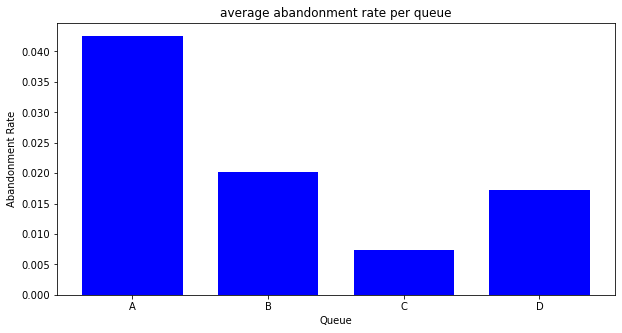

In [35]:
key = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key, values, color ='blue',
        width = 0.74)
 
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.title("average abandonment rate per queue")
plt.show()

In [36]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_clean_plt = north_clean.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_clean[north_clean["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_clean[north_clean["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")


# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,9,22.222222
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [37]:
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_clean[north_clean["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  

# Final Table
quick_stats

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


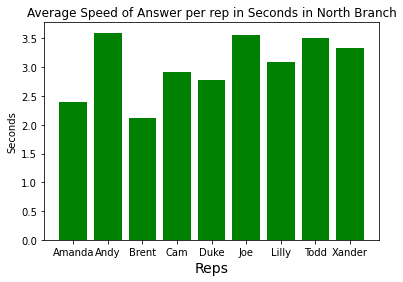

In [38]:
# north_plt contains the data you need for the average speed of answer of each rep
north_clean_plt = north_clean.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(north_clean_plt['Rep ID'], north_clean_plt["Incoming Wait Time"], color = 'green')
plt.title('Average Speed of Answer per rep in Seconds in North Branch')
plt.xlabel('Reps', fontsize = 14, color = 'black')
plt.ylabel("Seconds")
plt.show()

In [41]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby('Call Purpose')

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
purpose_counts

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64

In [42]:
#append another key and value pair to the dictionary so you can show no complaints came from outgoing calls
outgoing_add = {'Outgoing' : 0}
complaints.update(outgoing_add)
complaints

{'Incoming': 51, 'Outgoing': 0}

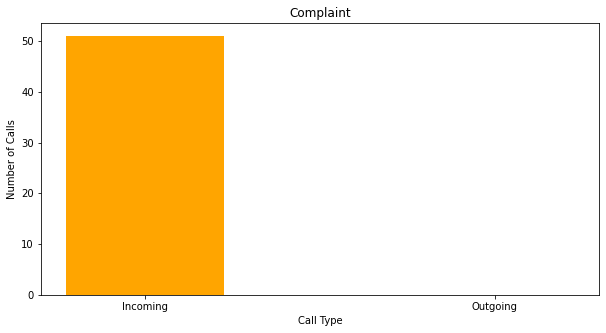

In [44]:
key = list(complaints.keys())
values = list(complaints.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key, values, color ='orange',
        width = 0.45)
 
plt.xlabel("Call Type")
plt.ylabel("Number of Calls")
plt.title("Complaint")
plt.show()

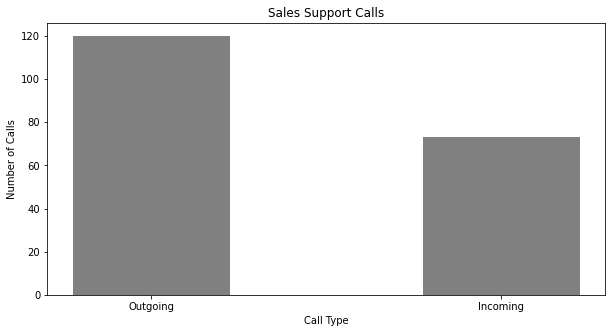

In [46]:
key = list(sales_support.keys())
values = list(sales_support.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key, values, color ='grey',
        width = 0.45)
 
plt.xlabel("Call Type")
plt.ylabel("Number of Calls")
plt.title("Sales Support Calls")
plt.show()

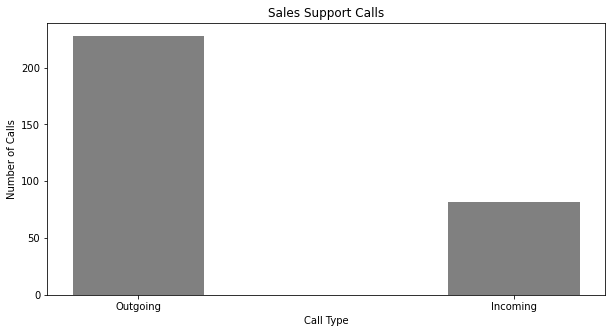

In [47]:
key = list(product_support.keys())
values = list(product_support.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key, values, color ='grey', width = 0.35)
 
plt.xlabel("Call Type")
plt.ylabel("Number of Calls")
plt.title("Sales Support Calls")
plt.show()

In [48]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.
Answer: I chose bar charts because they are very straight forward and easy to read.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
The South Branch seems to be operating more efficiently. It has lower averages for all the KPIs listed. However, it is hard to do an apples to apples comparison since the South Branch has two more reps and has a larger sample size of calls. Both of these could skew in favor of the South Branch being more efficient.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
For the reasons stated in answer to question 1, the North Branch could use more reps.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
It would have been interesting to have data on how much money is made per sale. It could give insight into why the North Branch had higher averages for the KPIs of interest. They may not be as efficient as the South Branch but they could be more profitable.


## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

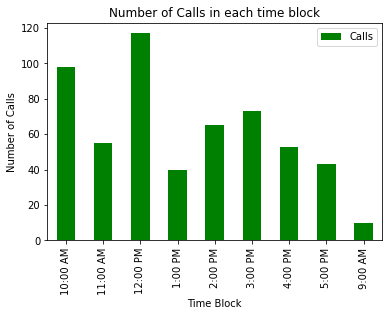

In [51]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
call_times.groupby('Time Block').sum().plot.bar(color = 'green')
plt.xlabel("Time Block")
plt.ylabel("Number of Calls")
plt.title("Number of Calls in each time block")
plt.show()